In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import time
from random import shuffle

C:\Users\secie\Anaconda3\envs\tensorflow_gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Training images size: 
 (24264, 32768)
Test images size: 
 (3034, 32768)
Training labels size: 
 (24264, 3)
Test labels size: 
 (3034, 3)


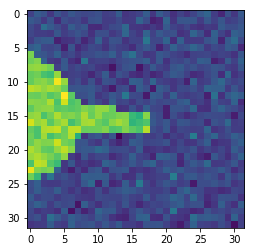

[[122.4332   89.2165  131.3125 ]
 [127.2571  101.53144 129.2354 ]
 [ 75.7787   68.1672  100.     ]
 [ 82.6139   64.2825  104.68855]
 [ 83.6274  135.7734  107.22495]
 [ 82.308    72.7659  123.3516 ]]


In [2]:
vol_training = np.load("E:/dataset_tesis/dataset_augmented/vol_training_augmented.npy")
vol_test = np.load("E:/dataset_tesis/dataset_augmented/vol_testing.npy")

lbl_training = np.load("E:/dataset_tesis/dataset_augmented/lbl_training_augmented.npy")
lbl_test = np.load("E:/dataset_tesis/dataset_augmented/lbl_testing.npy")

print("Training images size: \n",vol_training.shape)
print("Test images size: \n",vol_test.shape)

print("Training labels size: \n",lbl_training.shape)
print("Test labels size: \n",lbl_test.shape)

indice = 1000
slide = 0
vol_slide = np.reshape(vol_training[indice],(32,32,32))
vol_slide = vol_slide[:][:][slide]

plt.imshow(vol_slide)
plt.show()

print(lbl_training[0:6])


In [3]:
baraja = list(zip(vol_training, lbl_training))
shuffle(baraja)
vol_training, lbl_training = zip(*baraja)

In [4]:
def reset_graph():
    if 'sess' in globals() and sess:
        sess.close()
    tf.reset_default_graph()

In [5]:
def mini_red(x, n_classes = 3 ):
    mu = 0
    sigma = 0.1
    #limpiar graficas anteriores
    #reset_graph()
    
    #Imagenes 
    img = tf.reshape(x, shape=[-1, 32,32,32])
    #tf.summary.image("Image", img)
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([7,7,3,4], mean = mu, stddev = sigma)),
               'W_conv2':tf.Variable(tf.truncated_normal([5,5,4,5], mean = mu, stddev = sigma)),
               'W_fc1':tf.Variable(tf.truncated_normal([32*32*32,1500], mean = mu, stddev = sigma)),
               'W_fc2':tf.Variable(tf.truncated_normal([1500, 750], mean = mu, stddev = sigma)),
               'W_fc3':tf.Variable(tf.truncated_normal([750, 100], mean = mu, stddev = sigma)),
               'W_fc4':tf.Variable(tf.truncated_normal([100,50], mean= mu, stddev= sigma)),
               'out':tf.Variable(tf.truncated_normal([50, n_classes], mean = mu, stddev = sigma))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([4])),
              'b_conv2':tf.Variable(tf.random_normal([5])),
              'b_fc1':tf.Variable(tf.random_normal([1500])),
              'b_fc2':tf.Variable(tf.random_normal([750])),
              'b_fc3':tf.Variable(tf.random_normal([100])),
              'b_fc4':tf.Variable(tf.random_normal([50])),
              'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    #Input: 200x200x3     Output: 50x50x3
    #l1 = tf.nn.conv2d(img, weights['W_conv1'], strides=[1,2,2,1], padding='SAME')
    #l1 = tf.add(l1, biases['b_conv1'])
    #l1 = tf.nn.relu(l1)
    #l1 = tf.nn.dropout(l1, keep_rate2)
    #l1 = tf.nn.max_pool(l1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #Input: 50x50x3     Output: 50x50x6
    #l2 = tf.nn.conv2d(l1, weights['W_conv2'], strides=[1,1,1,1], padding='SAME')
    #l2 = tf.add(l2, biases['b_conv2'])
    #l2 = tf.nn.relu(l2)
    #l2 = tf.nn.dropout(l2, keep_rate2)
    
    #Input: 50x50x6     Output: 25x25x6
    #l2 = tf.nn.max_pool(l2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    #print(l2.shape)
    
    
    #Input: 6x6x8     Output: 128
    #fc1 = tf.reshape(l2, [-1, 25*25*5])
    fc1 = tf.nn.relu(tf.matmul(x, weights['W_fc1'])+biases['b_fc1'])
    fc1 = tf.nn.dropout(fc1, keep_rate)
                          
    #Input: 128     Output: 64
    fc2 = tf.nn.relu(tf.matmul(fc1, weights['W_fc2'])+biases['b_fc2'])
    fc2 = tf.nn.dropout(fc2, keep_rate)
    
    fc3 = tf.nn.relu(tf.matmul(fc2, weights['W_fc3'])+biases['b_fc3'])
    fc3 = tf.nn.dropout(fc3, keep_rate)
    
    fc4 = tf.nn.relu(tf.matmul(fc3, weights['W_fc4'])+biases['b_fc4'])
    fc4 = tf.nn.dropout(fc4, keep_rate)

    output_ = tf.matmul(fc4, weights['out'])+biases['out']

    # Declarando la funcion de costo y entrenamiento
    #cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y) )
    #optimizer = tf.train.AdamOptimizer(0.0001).minimize(cost)
    
    #almacenar costo
    #tf.summary.scalar("costo", cost)
    #generar logs
    #summaries = tf.summary.merge_all()
    
    return output_

In [6]:
def voxnet(x, n_classes = 3 ):
    mu = 0
    sigma = 0.1
    #limpiar graficas anteriores
    #reset_graph()
    
    #Imagenes 
    img = tf.reshape(x, shape=[-1, 32,32,32,1])
    #tf.summary.image("Image", img)
    # Declarando las variables 
    
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([5,5,5,1,32], mean = mu, stddev = sigma)),
               'W_conv2':tf.Variable(tf.truncated_normal([3,3,3,32,32], mean = mu, stddev = sigma)),
               'W_conv3':tf.Variable(tf.truncated_normal([3,3,3,12,8], mean = mu, stddev = sigma)),
               'W_fc1':tf.Variable(tf.truncated_normal([8*8*8*32,128], mean = mu, stddev = sigma)),
               'W_fc2':tf.Variable(tf.truncated_normal([1500, 500], mean = mu, stddev = sigma)),
               'W_fc3':tf.Variable(tf.truncated_normal([500, 100], mean = mu, stddev = sigma)),
               'W_fc4':tf.Variable(tf.truncated_normal([100,50], mean= mu, stddev= sigma)),
               'out':tf.Variable(tf.truncated_normal([128, n_classes], mean = mu, stddev = sigma))}
    """
    
    weights = {'W_conv1':tf.Variable(tf.random_normal([5,5,5,1,32])),
               'W_conv2':tf.Variable(tf.random_normal([3,3,3,32,32])),
               'W_conv3':tf.Variable(tf.random_normal([3,3,3,12,8])),
               'W_fc1':tf.Variable(tf.random_normal([8*8*8*32,128])),
               'W_fc2':tf.Variable(tf.random_normal([1500, 500])),
               'W_fc3':tf.Variable(tf.random_normal([500, 100])),
               'W_fc4':tf.Variable(tf.random_normal([100,50])),
               'out':tf.Variable(tf.random_normal([128, n_classes]))}
    """

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
              'b_conv2':tf.Variable(tf.random_normal([32])),
              'b_conv3':tf.Variable(tf.random_normal([8])),
              'b_fc1':tf.Variable(tf.random_normal([128])),
              'b_fc2':tf.Variable(tf.random_normal([500])),
              'b_fc3':tf.Variable(tf.random_normal([100])),
              'b_fc4':tf.Variable(tf.random_normal([50])),
              'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    #Input: 200x200x3     Output: 50x50x3
    l1 = tf.nn.conv3d(img, weights['W_conv1'], strides=[1,2,2,2,1], padding='SAME')
    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    #l1 = tf.nn.leaky_relu(l1)
    print("l1: ",l1.shape)
    #l1 = tf.nn.dropout(l1, keep_rate)
    #l1 = tf.nn.max_pool3d(l1, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='VALID')
    
    #Input: 50x50x3     Output: 50x50x6
    l2 = tf.nn.conv3d(l1, weights['W_conv2'], strides=[1,1,1,1,1], padding='SAME')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    #l2 = tf.nn.leaky_relu(l2)
    #l2 = tf.nn.dropout(l2, keep_rate)
    #print(l2)
    
    #Input: 50x50x6     Output: 25x25x6
    l2 = tf.nn.max_pool3d(l2, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='VALID')
    print("l2: ",l2.shape)
    
    #l3 = tf.nn.conv3d(l2, weights['W_conv3'], strides=[1,1,1,1,1], padding='SAME')
    #l3= tf.add(l3, biases['b_conv3'])
    #l3 = tf.nn.relu(l3)
    #l2 = tf.nn.dropout(l2, keep_rate2)
    #print(l2)
    
    #Input: 50x50x6     Output: 25x25x6
    #l3 = tf.nn.max_pool3d(l3, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='VALID')
    #print(l3.shape)
    
    
    #Input: 6x6x8     Output: 128
    fc1 = tf.reshape(l2, [-1, 8*8*8*32])
    fc1 = tf.nn.relu(tf.matmul(fc1, weights['W_fc1'])+biases['b_fc1'])
    #fc1 = tf.nn.leaky_relu(tf.matmul(fc1, weights['W_fc1'])+biases['b_fc1'])
    fc1 = tf.nn.dropout(fc1, keep_rate)
                          
    #Input: 128     Output: 64
    #fc2 = tf.nn.relu(tf.matmul(fc1, weights['W_fc2'])+biases['b_fc2'])
    #fc2 = tf.nn.dropout(fc2, keep_rate)
    
    #fc3 = tf.nn.relu(tf.matmul(fc2, weights['W_fc3'])+biases['b_fc3'])
    #fc3 = tf.nn.dropout(fc3, keep_rate)
    
    #fc4 = tf.nn.relu(tf.matmul(fc3, weights['W_fc4'])+biases['b_fc4'])
    #fc4 = tf.nn.dropout(fc4, keep_rate)

    output_ = tf.matmul(fc1, weights['out'])+biases['out']

    # Declarando la funcion de costo y entrenamiento
    #cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y) )
    #optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    #almacenar costo
    #tf.summary.scalar("costo", cost)
    #generar logs
    #summaries = tf.summary.merge_all()
    
    return output_

In [7]:
def red_3d(x, n_classes = 3 ):
    mu = 0
    sigma = 0.1
    #limpiar graficas anteriores
    #reset_graph()  
    #Imagenes 
    img = tf.reshape(x, shape=[-1, 32,32,32,1])
    #tf.summary.image("Image", img)
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([3,3,3,1,32], mean = mu, stddev = sigma)),
               'W_conv2':tf.Variable(tf.truncated_normal([3,3,3,32,32], mean = mu, stddev = sigma)),
               'W_conv3':tf.Variable(tf.truncated_normal([3,3,3,32,16], mean = mu, stddev = sigma)),
               'W_fc1':tf.Variable(tf.truncated_normal([4*4*4*16,1500], mean = mu, stddev = sigma)),
               'W_fc2':tf.Variable(tf.truncated_normal([1500, 500], mean = mu, stddev = sigma)),
               'W_fc3':tf.Variable(tf.truncated_normal([1500, 100], mean = mu, stddev = sigma)),
               'W_fc4':tf.Variable(tf.truncated_normal([100,50], mean= mu, stddev= sigma)),
               'out':tf.Variable(tf.truncated_normal([50, n_classes], mean = mu, stddev = sigma))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
              'b_conv2':tf.Variable(tf.random_normal([32])),
              'b_conv3':tf.Variable(tf.random_normal([16])),
              'b_fc1':tf.Variable(tf.random_normal([1500])),
              'b_fc2':tf.Variable(tf.random_normal([500])),
              'b_fc3':tf.Variable(tf.random_normal([100])),
              'b_fc4':tf.Variable(tf.random_normal([50])),
              'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    #Input: 200x200x3     Output: 50x50x3
    l1 = tf.nn.conv3d(img, weights['W_conv1'], strides=[1,1,1,1,1], padding='SAME')
    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    print(l1.shape)
    #l1 = tf.nn.dropout(l1, keep_rate2)
    l1 = tf.nn.max_pool3d(l1, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='VALID')
    
    #Input: 50x50x3     Output: 50x50x6
    l2 = tf.nn.conv3d(l1, weights['W_conv2'], strides=[1,1,1,1,1], padding='SAME')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    #l2 = tf.nn.dropout(l2, keep_rate2)
    #print(l2)
    
    #Input: 50x50x6     Output: 25x25x6
    l2 = tf.nn.max_pool3d(l2, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='VALID')
    print(l2.shape)
    
    l3 = tf.nn.conv3d(l2, weights['W_conv3'], strides=[1,1,1,1,1], padding='SAME')
    l3= tf.add(l3, biases['b_conv3'])
    l3 = tf.nn.relu(l3)
    #l3 = tf.nn.dropout(l3, keep_rate)
    #print(l2)
    
    #Input: 50x50x6     Output: 25x25x6
    l3 = tf.nn.max_pool3d(l3, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='VALID')
    print(l3.shape)
    
    
    #Input: 6x6x8     Output: 128
    fc1 = tf.reshape(l3, [-1, 4*4*4*16])
    fc1 = tf.nn.relu(tf.matmul(fc1, weights['W_fc1'])+biases['b_fc1'])
    #fc1 = tf.nn.dropout(fc1, keep_rate)
                          
    #Input: 128     Output: 64
    #fc2 = tf.nn.relu(tf.matmul(fc1, weights['W_fc2'])+biases['b_fc2'])
    #fc2 = tf.nn.dropout(fc2, keep_rate)
    
    fc3 = tf.nn.relu(tf.matmul(fc1, weights['W_fc3'])+biases['b_fc3'])
    #fc3 = tf.nn.dropout(fc3, keep_rate)
    
    fc4 = tf.nn.relu(tf.matmul(fc3, weights['W_fc4'])+biases['b_fc4'])
    fc4 = tf.nn.dropout(fc4, keep_rate)

    output_ = tf.matmul(fc4, weights['out'])+biases['out']
    
    #almacenar costo
    #tf.summary.scalar("costo", cost)
    #generar logs
    #summaries = tf.summary.merge_all()
    
    return output_
        #saver = tf.train.Saver()

In [8]:
# Declarando las entradas y salidas
x=tf.placeholder('float',[None,32*32*32])
y=tf.placeholder('float')
keep_rate = tf.placeholder(tf.float32)
learning_rate = tf.placeholder(tf.float32)
output = mini_red(x)#################################

cost = tf.reduce_mean( tf.squared_difference(output, y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

#correct = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
#accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

In [9]:
def evaluate(x_data, y_data, eval_batch_size):
    sess = tf.get_default_session()
    eval_i = 0
    total_cost = 0
    count = 0
    for _ in range(int(len(x_data)/eval_batch_size)):
        eval_x = x_data[eval_i:eval_i + eval_batch_size]
        eval_y = y_data[eval_i:eval_i + eval_batch_size]
        eval_cost = sess.run(cost, feed_dict = {x:eval_x, y:eval_y, keep_rate: 1, learning_rate: 0.0005})
        total_cost += eval_cost
        eval_i = eval_i + eval_batch_size
        count = count  + 1
    total_cost = total_cost / count 
    return total_cost

In [10]:
def predicted_output(x_data, y_data, k_rate = 1):
    sess = tf.get_default_session()
    y_predicted = []
    for i in range(len(x_data)):
        val = sess.run(output, feed_dict={x: x_data[i:i+1], y:y_data[i:i+1], keep_rate: k_rate, learning_rate: 0.0005})
        y_predicted.append(val)
    return y_predicted

In [11]:
def train_nn(epochs = 600, batch_size = 100, save = False):
    saver = tf.train.Saver()
    start_time = time.time()
    train_accuracy = []
    test_error = []
    epoch_loss_ = []
    l_r = 0.001
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #writer = tf.summary.FileWriter("./Octree_logs")
        #tf.summary.FileWriter.add_graph(writer,sess.graph)
        #writer.add_graph(sess.graph)
        i_prin = 0
        for epoch in range(epochs):
            epoch_loss = 0
            i = 0
            count = 0
            if (epoch%100 == 0 and epoch > 0):
                l_r = l_r - 0.0001
            for _ in range(int(len(vol_training)/batch_size)):
                epoch_x = vol_training[i:i+batch_size]
                epoch_y = lbl_training[i:i+batch_size]
                sess.run(optimizer ,feed_dict={x: epoch_x, y: epoch_y, keep_rate: 0.65, learning_rate: l_r})
                c = sess.run(cost, feed_dict = {x: epoch_x, y: epoch_y, keep_rate: 1, learning_rate: 0.0005})
                epoch_loss += c
                i =i+batch_size
                count += 1
            
            epoch_loss_.append(epoch_loss/count)
            test_error.append(evaluate(vol_test, lbl_test, batch_size))
            
            if (epoch%20 == 0):
                pass
                #writer.add_summary(epoch_loss, epoch).eval()
            if (epoch%50 ==0):
                if isinstance(save, bool):
                    ENCname="./SVEoctree_reg/"+str(epoch)+".ckpt"
                    saver.save(sess, ENCname)

            print("Epoch: ", epoch,"lr: ",l_r ,"\n \t Training Error: ", epoch_loss_[i_prin])
            print("\t Test Error: ", test_error[i_prin])
            i_prin = i_prin + 1
        #####  X,Y,Z predicted and true values #####
        #final_train_predicted = predicted_output(vol_training, lbl_training, 1)
        #final_test_predicted = predicted_output(vol_test, lbl_test, 1)

    print("--- %s seconds ---" % (time.time() - start_time))
    return epoch_loss_, test_error

In [12]:
train_loss, test_loss = train_nn(801, 200, False)
np.save("train_loss_voxnet", train_loss)
np.save("test_loss_voxnet", test_loss)

Epoch:  0 lr:  0.001 
 	 Training Error:  1478.4331458225722
	 Test Error:  828.8123291015625
Epoch:  1 lr:  0.001 
 	 Training Error:  1418.391658562274
	 Test Error:  1634.6110758463542
Epoch:  2 lr:  0.001 
 	 Training Error:  2151.7214305026473
	 Test Error:  2013.9858154296876
Epoch:  3 lr:  0.001 
 	 Training Error:  2372.44485145758
	 Test Error:  2302.8455403645835
Epoch:  4 lr:  0.001 
 	 Training Error:  2357.8476683561466
	 Test Error:  1906.2046712239583
Epoch:  5 lr:  0.001 
 	 Training Error:  2201.993175159801
	 Test Error:  1860.2126139322916
Epoch:  6 lr:  0.001 
 	 Training Error:  2176.1180238329675
	 Test Error:  1759.2151123046874
Epoch:  7 lr:  0.001 
 	 Training Error:  1970.9766724641659
	 Test Error:  2076.7834635416666
Epoch:  8 lr:  0.001 
 	 Training Error:  1952.3569295583677
	 Test Error:  1705.5360921223958
Epoch:  9 lr:  0.001 
 	 Training Error:  1915.0002088310305
	 Test Error:  1525.1797444661458
Epoch:  10 lr:  0.001 
 	 Training Error:  1906.0145354

Epoch:  86 lr:  0.001 
 	 Training Error:  1233.7568384596138
	 Test Error:  1064.175557454427
Epoch:  87 lr:  0.001 
 	 Training Error:  1221.6383424869255
	 Test Error:  1441.6482259114584
Epoch:  88 lr:  0.001 
 	 Training Error:  1200.8357110141724
	 Test Error:  1275.7881103515624
Epoch:  89 lr:  0.001 
 	 Training Error:  1191.7686828108858
	 Test Error:  871.0031005859375
Epoch:  90 lr:  0.001 
 	 Training Error:  1192.3417847688534
	 Test Error:  1191.8929036458333
Epoch:  91 lr:  0.001 
 	 Training Error:  1182.504766290838
	 Test Error:  1162.2622151692708
Epoch:  92 lr:  0.001 
 	 Training Error:  1160.9350908768079
	 Test Error:  1171.2181966145833
Epoch:  93 lr:  0.001 
 	 Training Error:  1168.900068803267
	 Test Error:  1204.7487874348958
Epoch:  94 lr:  0.001 
 	 Training Error:  1148.9333990428074
	 Test Error:  905.5347574869792
Epoch:  95 lr:  0.001 
 	 Training Error:  1123.9877011638043
	 Test Error:  1042.9445678710938
Epoch:  96 lr:  0.001 
 	 Training Error:  11

Epoch:  172 lr:  0.0009 
 	 Training Error:  501.673133282622
	 Test Error:  463.0977803548177
Epoch:  173 lr:  0.0009 
 	 Training Error:  502.42071028780344
	 Test Error:  464.40615234375
Epoch:  174 lr:  0.0009 
 	 Training Error:  509.29667751848206
	 Test Error:  525.6243326822917
Epoch:  175 lr:  0.0009 
 	 Training Error:  494.461148600933
	 Test Error:  478.6116251627604
Epoch:  176 lr:  0.0009 
 	 Training Error:  500.54754638671875
	 Test Error:  454.66563720703124
Epoch:  177 lr:  0.0009 
 	 Training Error:  502.77074892658834
	 Test Error:  450.25929158528646
Epoch:  178 lr:  0.0009 
 	 Training Error:  498.5143488103693
	 Test Error:  466.4057678222656
Epoch:  179 lr:  0.0009 
 	 Training Error:  497.2298180446152
	 Test Error:  494.93190714518227
Epoch:  180 lr:  0.0009 
 	 Training Error:  503.751646183739
	 Test Error:  481.3204020182292
Epoch:  181 lr:  0.0009 
 	 Training Error:  498.7507301519725
	 Test Error:  450.28066202799477
Epoch:  182 lr:  0.0009 
 	 Training 

Epoch:  250 lr:  0.0007999999999999999 
 	 Training Error:  492.15563409978694
	 Test Error:  467.39219767252604
Epoch:  251 lr:  0.0007999999999999999 
 	 Training Error:  492.5410819565954
	 Test Error:  482.57411092122396
Epoch:  252 lr:  0.0007999999999999999 
 	 Training Error:  496.6137390136719
	 Test Error:  476.80137532552084
Epoch:  253 lr:  0.0007999999999999999 
 	 Training Error:  500.1329623135653
	 Test Error:  485.80418701171874
Epoch:  254 lr:  0.0007999999999999999 
 	 Training Error:  496.0795184679268
	 Test Error:  520.8922444661458
Epoch:  255 lr:  0.0007999999999999999 
 	 Training Error:  501.11676529813406
	 Test Error:  508.7808125813802
Epoch:  256 lr:  0.0007999999999999999 
 	 Training Error:  500.3691161604952
	 Test Error:  506.3195780436198
Epoch:  257 lr:  0.0007999999999999999 
 	 Training Error:  493.8731069013107
	 Test Error:  460.4729960123698
Epoch:  258 lr:  0.0007999999999999999 
 	 Training Error:  486.63446549344656
	 Test Error:  430.27031453

Epoch:  324 lr:  0.0006999999999999999 
 	 Training Error:  512.2673826611732
	 Test Error:  454.77638549804686
Epoch:  325 lr:  0.0006999999999999999 
 	 Training Error:  511.5039281923909
	 Test Error:  502.7173360188802
Epoch:  326 lr:  0.0006999999999999999 
 	 Training Error:  507.3214847785382
	 Test Error:  540.214774576823
Epoch:  327 lr:  0.0006999999999999999 
 	 Training Error:  509.3449270705546
	 Test Error:  530.4613749186198
Epoch:  328 lr:  0.0006999999999999999 
 	 Training Error:  522.0522541645145
	 Test Error:  533.3130737304688
Epoch:  329 lr:  0.0006999999999999999 
 	 Training Error:  508.74178320514267
	 Test Error:  460.090732828776
Epoch:  330 lr:  0.0006999999999999999 
 	 Training Error:  503.5051842051104
	 Test Error:  519.6910502115885
Epoch:  331 lr:  0.0006999999999999999 
 	 Training Error:  510.9425109358858
	 Test Error:  516.011045328776
Epoch:  332 lr:  0.0006999999999999999 
 	 Training Error:  517.9847800514915
	 Test Error:  532.935605875651
Epo

Epoch:  398 lr:  0.0006999999999999999 
 	 Training Error:  516.5777340723463
	 Test Error:  538.1141235351563
Epoch:  399 lr:  0.0006999999999999999 
 	 Training Error:  513.3039578524503
	 Test Error:  495.51719970703124
Epoch:  400 lr:  0.0005999999999999998 
 	 Training Error:  514.438500522582
	 Test Error:  457.31171875
Epoch:  401 lr:  0.0005999999999999998 
 	 Training Error:  511.9927118474787
	 Test Error:  502.6196818033854
Epoch:  402 lr:  0.0005999999999999998 
 	 Training Error:  517.1871161342652
	 Test Error:  490.992138671875
Epoch:  403 lr:  0.0005999999999999998 
 	 Training Error:  513.7751792718557
	 Test Error:  482.68504028320314
Epoch:  404 lr:  0.0005999999999999998 
 	 Training Error:  510.6811571357664
	 Test Error:  498.5823201497396
Epoch:  405 lr:  0.0005999999999999998 
 	 Training Error:  506.63351667419937
	 Test Error:  483.55065104166664
Epoch:  406 lr:  0.0005999999999999998 
 	 Training Error:  509.5660387780056
	 Test Error:  518.1639322916667
Epoc

Epoch:  472 lr:  0.0005999999999999998 
 	 Training Error:  525.1720893796811
	 Test Error:  526.6755411783854
Epoch:  473 lr:  0.0005999999999999998 
 	 Training Error:  517.6668501924877
	 Test Error:  519.9000427246094
Epoch:  474 lr:  0.0005999999999999998 
 	 Training Error:  517.9673350941051
	 Test Error:  557.6317342122396
Epoch:  475 lr:  0.0005999999999999998 
 	 Training Error:  514.4995195373031
	 Test Error:  492.13092447916665
Epoch:  476 lr:  0.0005999999999999998 
 	 Training Error:  512.7358759099787
	 Test Error:  508.53651123046876
Epoch:  477 lr:  0.0005999999999999998 
 	 Training Error:  517.3814581248386
	 Test Error:  480.0543538411458
Epoch:  478 lr:  0.0005999999999999998 
 	 Training Error:  520.2174125230017
	 Test Error:  506.0083374023437
Epoch:  479 lr:  0.0005999999999999998 
 	 Training Error:  527.1384307609117
	 Test Error:  515.4041259765625
Epoch:  480 lr:  0.0005999999999999998 
 	 Training Error:  518.6467716437726
	 Test Error:  531.8410319010417

Epoch:  546 lr:  0.0004999999999999998 
 	 Training Error:  519.8209425240509
	 Test Error:  533.6439168294271
Epoch:  547 lr:  0.0004999999999999998 
 	 Training Error:  524.8421948645725
	 Test Error:  523.1193603515625
Epoch:  548 lr:  0.0004999999999999998 
 	 Training Error:  518.0980509608245
	 Test Error:  497.74866739908856
Epoch:  549 lr:  0.0004999999999999998 
 	 Training Error:  514.9931285006941
	 Test Error:  494.57078450520834
Epoch:  550 lr:  0.0004999999999999998 
 	 Training Error:  519.1564570655507
	 Test Error:  468.06153157552086
Epoch:  551 lr:  0.0004999999999999998 
 	 Training Error:  521.2413721005779
	 Test Error:  486.87987060546874
Epoch:  552 lr:  0.0004999999999999998 
 	 Training Error:  517.7559660604178
	 Test Error:  542.0334187825521
Epoch:  553 lr:  0.0004999999999999998 
 	 Training Error:  516.8525589871998
	 Test Error:  497.87310791015625
Epoch:  554 lr:  0.0004999999999999998 
 	 Training Error:  523.6958832543744
	 Test Error:  518.7773518880

Epoch:  620 lr:  0.0003999999999999998 
 	 Training Error:  519.5958854738345
	 Test Error:  482.17164103190106
Epoch:  621 lr:  0.0003999999999999998 
 	 Training Error:  519.1326810978661
	 Test Error:  506.4101155598958
Epoch:  622 lr:  0.0003999999999999998 
 	 Training Error:  518.3985835303945
	 Test Error:  524.935703531901
Epoch:  623 lr:  0.0003999999999999998 
 	 Training Error:  515.8449258094977
	 Test Error:  496.87696736653646
Epoch:  624 lr:  0.0003999999999999998 
 	 Training Error:  522.2717981259685
	 Test Error:  514.6480570475261
Epoch:  625 lr:  0.0003999999999999998 
 	 Training Error:  523.0752757679332
	 Test Error:  505.7332804361979
Epoch:  626 lr:  0.0003999999999999998 
 	 Training Error:  522.6803644353694
	 Test Error:  503.195273844401
Epoch:  627 lr:  0.0003999999999999998 
 	 Training Error:  527.3540785608213
	 Test Error:  540.8527750651042
Epoch:  628 lr:  0.0003999999999999998 
 	 Training Error:  524.5927189598399
	 Test Error:  509.92673950195314


Epoch:  694 lr:  0.0003999999999999998 
 	 Training Error:  522.4252430308949
	 Test Error:  512.6860290527344
Epoch:  695 lr:  0.0003999999999999998 
 	 Training Error:  521.5451662678364
	 Test Error:  532.7410135904948
Epoch:  696 lr:  0.0003999999999999998 
 	 Training Error:  519.7511051903086
	 Test Error:  512.5962483723958
Epoch:  697 lr:  0.0003999999999999998 
 	 Training Error:  518.9177162863991
	 Test Error:  497.74371948242185
Epoch:  698 lr:  0.0003999999999999998 
 	 Training Error:  522.4041112474174
	 Test Error:  523.4249145507813
Epoch:  699 lr:  0.0003999999999999998 
 	 Training Error:  525.5842121218847
	 Test Error:  518.0889200846354
Epoch:  700 lr:  0.0002999999999999998 
 	 Training Error:  527.326057875452
	 Test Error:  531.2957865397135
Epoch:  701 lr:  0.0002999999999999998 
 	 Training Error:  523.8764249943505
	 Test Error:  537.7065979003906
Epoch:  702 lr:  0.0002999999999999998 
 	 Training Error:  523.2826031141045
	 Test Error:  492.70652669270834


Epoch:  768 lr:  0.0002999999999999998 
 	 Training Error:  534.8660331284705
	 Test Error:  560.2093017578125
Epoch:  769 lr:  0.0002999999999999998 
 	 Training Error:  530.1989572067891
	 Test Error:  531.7654642740886
Epoch:  770 lr:  0.0002999999999999998 
 	 Training Error:  527.0901907928719
	 Test Error:  530.6954467773437
Epoch:  771 lr:  0.0002999999999999998 
 	 Training Error:  524.5836678497062
	 Test Error:  536.81806640625
Epoch:  772 lr:  0.0002999999999999998 
 	 Training Error:  528.0060079275084
	 Test Error:  576.6861287434896
Epoch:  773 lr:  0.0002999999999999998 
 	 Training Error:  522.7526015604823
	 Test Error:  567.3879191080729
Epoch:  774 lr:  0.0002999999999999998 
 	 Training Error:  529.383281360973
	 Test Error:  583.6823527018229
Epoch:  775 lr:  0.0002999999999999998 
 	 Training Error:  527.6625245149471
	 Test Error:  548.0402547200521
Epoch:  776 lr:  0.0002999999999999998 
 	 Training Error:  527.1142449497191
	 Test Error:  523.8937133789062
Epoc

C:\Users\secie\Anaconda3\envs\tensorflow_gpu\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


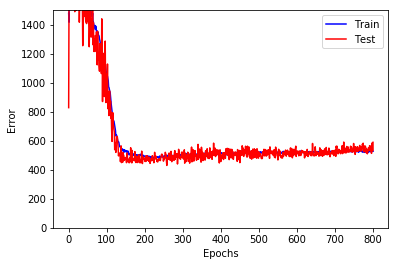

In [19]:
##### Plot error ########
fig = plt.figure()
fig, ax = plt.subplots()
x_axe = np.arange(0,len(train_loss),1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Error')
ax.plot(x_axe, train_loss, 'b', label = 'Train')
ax.plot(x_axe, test_loss, 'r', label = 'Test')
ax.set_ylim(top = 1500, bottom= 0)
ax.legend()
fig.show()
fig.savefig("minired_error_v1.jpg", dpi = 300)


In [14]:
def test_neural_network():
    saver = tf.train.Saver()
    with tf.Session() as sess:
        model_path = 'SVEoctree_reg/750.ckpt'
        sess.run(tf.global_variables_initializer())
        saver.restore(sess, model_path)
        final_train_predicted = predicted_output(vol_training, lbl_training, 1)
        final_test_predicted = predicted_output(vol_test, lbl_test, 1)
        return final_train_predicted, final_test_predicted

In [15]:
train_pred, test_pred = test_neural_network()

INFO:tensorflow:Restoring parameters from SVEoctree_reg/750.ckpt


In [16]:
### Variables Definition ###

####### Predicted ############
train_pred = np.array(train_pred)
test_pred = np.array(test_pred)
lbl_training = np.array(lbl_training)

x_train_pred = train_pred[:,0][:,0]
y_train_pred = train_pred[:,0][:,1]
z_train_pred = train_pred[:,0][:,2]

x_test_pred = test_pred[:,0][:,0]
y_test_pred = test_pred[:,0][:,1]
z_test_pred = test_pred[:,0][:,2]

print(type(lbl_training))
####### True ################
x_train_true = lbl_training[:,0]
y_train_true = lbl_training[:,1]
z_train_true = lbl_training[:,2]

x_test_true = lbl_test[:,0]
y_test_true = lbl_test[:,1]
z_test_true = lbl_test[:,2]
print(x_test_true)


<class 'numpy.ndarray'>
[117.8774  137.4298   66.7619  ... 139.5321  127.2571  107.86008]


C:\Users\secie\Anaconda3\envs\tensorflow_gpu\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


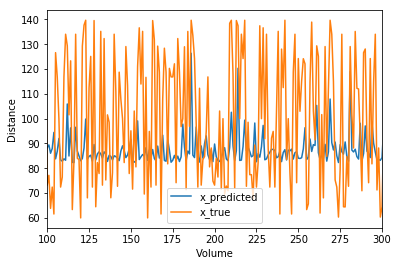

In [17]:
#%matplotlib notebook
inf = 100
sup = 300
##### Plot x train######
fig = plt.figure()
fig, ax = plt.subplots()
x_axe = np.arange(0,len(x_test_pred),1)
#ax = fig.add_axes([1,1,1,1])
ax.set_xlabel('Volume')
ax.set_ylabel('Distance')
ax.plot(x_axe, x_test_pred, label = 'x_predicted')
ax.plot(x_axe, x_test_true, label = 'x_true')
ax.set_xlim(left=inf, right=sup)
fig.show()
fig.savefig("minired_x_test_function_v1.png", dpi = 300)
ax.legend()


C:\Users\secie\Anaconda3\envs\tensorflow_gpu\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


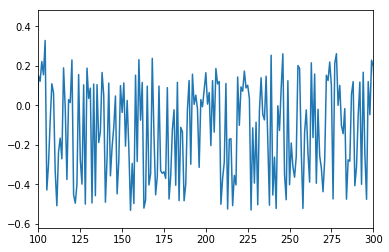

In [18]:
#error_function = ((x_test_pred - x_test_true)/100)-1
error_function = ((x_test_pred/100)-1) - ((x_test_true/100)-1)
x_axe_error = np.arange(0,len(error_function),1)
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(x_axe_error, error_function)
ax.set_xlim(left = inf, right=sup)
fig.show()
fig.savefig("error_minired_v1.png", dpi = 300)